# bao-yue-rao
Source article:
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0180944

Source article raw data:
- https://figshare.com/articles/Raw_Data/5028110

In [11]:
# Data Cleaning & Loading

In [2]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt

from collections import OrderedDict
import xlrd
import xlsxwriter

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt

# Machine learning imports
import sklearn
import tensorflow as tf
import keras

import pywt
from scipy import signal

Using TensorFlow backend.


In [3]:
# Imports (Internal)

In [4]:
# Load in excel file and map each excel sheet to an ordered dict
raw_xlsx_file = pd.ExcelFile("data/raw_data.xlsx")
dict_dataframes =pd.read_excel(raw_xlsx_file,sheet_name = None)

In [5]:
# Alternate method to map multiple excel sheets from file and access via dataframe/ordereddict

#sheet_to_df_map = pd.read_excel(raw_xlsx_file, sheet_name=None)
#sheet_to_df_map['HangSeng Index Data']

In [6]:
type(dict_dataframes)

collections.OrderedDict

In [52]:
# Convert ordered of dataframes to regular dict
dict_dataframes= dict(dict_dataframes)
type(dict_dataframes)

dict

In [53]:
# Convert all sheet names/dict keys to lowercase using list comprehension 
    # Source: https://stackoverflow.com/a/38572808
dict_dataframes = {k.lower(): v for k, v in dict_dataframes.items()}

# Print number of sheets in raw_data
print("Number of sheets: ",len(dict_dataframes),"\n")
print("\n".join(list(dict_dataframes.keys())))
#print(raw_xlsx_file.sheet_names)

Number of sheets:  12 

hangseng index data
hangseng index future data
s&p500 index data
s&p500 index future data
csi300 index data
csi300 index future data
djia index data
djia index future data
nikkei 225 index data
nikkei 225 index future data
nifty 50 index data
nifty 50 index future data


Table 6. Profitability performance of each model (Panel A, Panel B, Panel C)
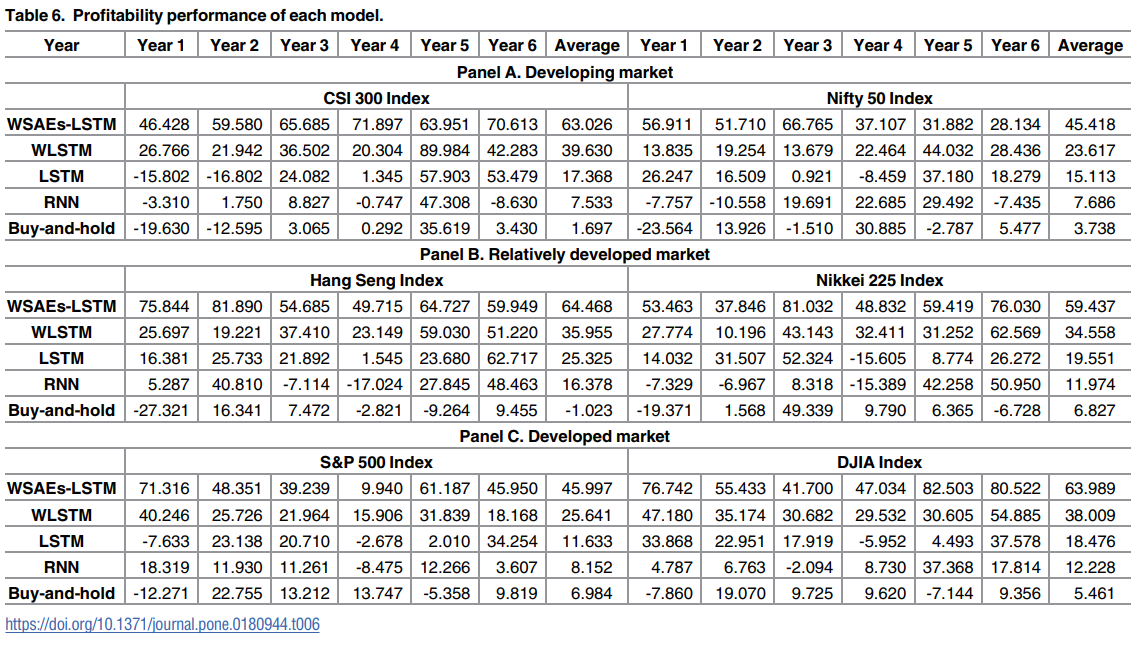

Panel A, Developing Market, Relatively Developed Market, Developed Market
- CSI 300 Index
- Nifty 50 Index

Panel B, Relatively Developed Market
- Hang Seng Index
- Nikkei 225 Index

Panel C, Developed Market
- S&P 500 Index
- DJIA Index

In [54]:
# Panel A, Developing Market

# 'csi300 index data',
# 'csi300 index future data'
# 'nifty 50 index data'
# 'nifty 50 index future data'

In [55]:
# Panel B, Relatively Developed Market

# 'hangseng index data'
# 'hangseng index future data'
# 'nikkei 225 index data'
# 'nikkei 225 index future data'

In [56]:
# Panel C, Developed Market

# 's&p500 index data',
# 's&p500 index future data',
# 'djia index data',
# 'djia index future data',

In [57]:
# Rename all dataframe column headers in each dataframe in dict_dataframes to lowercase
for item in dict_dataframes:
    dict_dataframes[item].columns = map(str.lower, dict_dataframes[item].columns)

In [58]:
# Convert dict back to orderdict after reorder to match Panel A/B/C format
    # Source: https://stackoverflow.com/a/46447976

key_order = ['csi300 index data',
'csi300 index future data',
'nifty 50 index data',
'nifty 50 index future data',
'hangseng index data',
'hangseng index future data',
'nikkei 225 index data',
'nikkei 225 index future data',
's&p500 index data',
's&p500 index future data',
'djia index data',
'djia index future data',
]
list_of_tuples = [(key, dict_dataframes[key]) for key in key_order]
dict_dataframes = OrderedDict(list_of_tuples)

In [69]:
for item in dict_dataframes:
    # Obtain number of rows in dataframe
    #rc=dict_dataframes[item].shape[0]
    # Obtain number of columns in dataframe
    #cc =  len(dict_dataframes[item].columns)
    print ("=======================================")
    print (item,"\n")
    print (dict_dataframes[item].info(verbose=False))

csi300 index data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Columns: 20 entries, date to wvad
dtypes: float64(19), int64(1)
memory usage: 314.1 KB
None
csi300 index future data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 2 entries, date to close
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
nifty 50 index data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Columns: 20 entries, date to interbank offered rate
dtypes: float64(18), int64(2)
memory usage: 319.3 KB
None
nifty 50 index future data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Columns: 2 entries, date to close
dtypes: float64(1), int64(1)
memory usage: 23.4 KB
None
hangseng index data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Columns: 20 entries, date to hibor
dtypes: float64(19), int64(1)
memory usage: 318.4 KB
None
hangseng index future data 

<class

In [60]:
# Obtain column datatypes
#print(dict_dataframes['csi300 index data'].dtypes)
#print(dict_dataframes['csi300 index future data'].dtypes)

In [61]:
# Alternate method of obtaining dataframe row/column/dtype information
#for item in dict_dataframes:
    #print(item)
    #print(dict_dataframes[item].info())

In [62]:
dict_dataframes['csi300 index data'].head()

,time,open price,high price,low price,closing price,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
0,20080701,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,20080702,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08
2,20080703,2654.48,2807.68,2617.26,2760.61,456603.05,72.73,2.5762,-206.941406,-112.113057,190.424,3109.044731,2978.942155,2820.8364,-208.925,2753.2792,-82.064,-2.886857,-0.031251,-5.855737e+07
3,20080704,2751.21,2783.85,2716.02,2741.85,379050.10,72.71,2.5632,-200.759162,-81.997539,67.825,3073.107115,2956.362140,2810.0548,-239.055,2738.4454,-249.421,-8.338289,-0.017237,-7.467503e+07
4,20080707,2747.61,2890.99,2747.61,2882.76,527320.24,72.71,2.5679,-182.386907,21.707767,149.133,3046.256923,2949.352699,2819.3370,66.742,2756.6342,109.687,3.955427,0.010701,-3.531151e+07


Table 1. Description of the input variables:

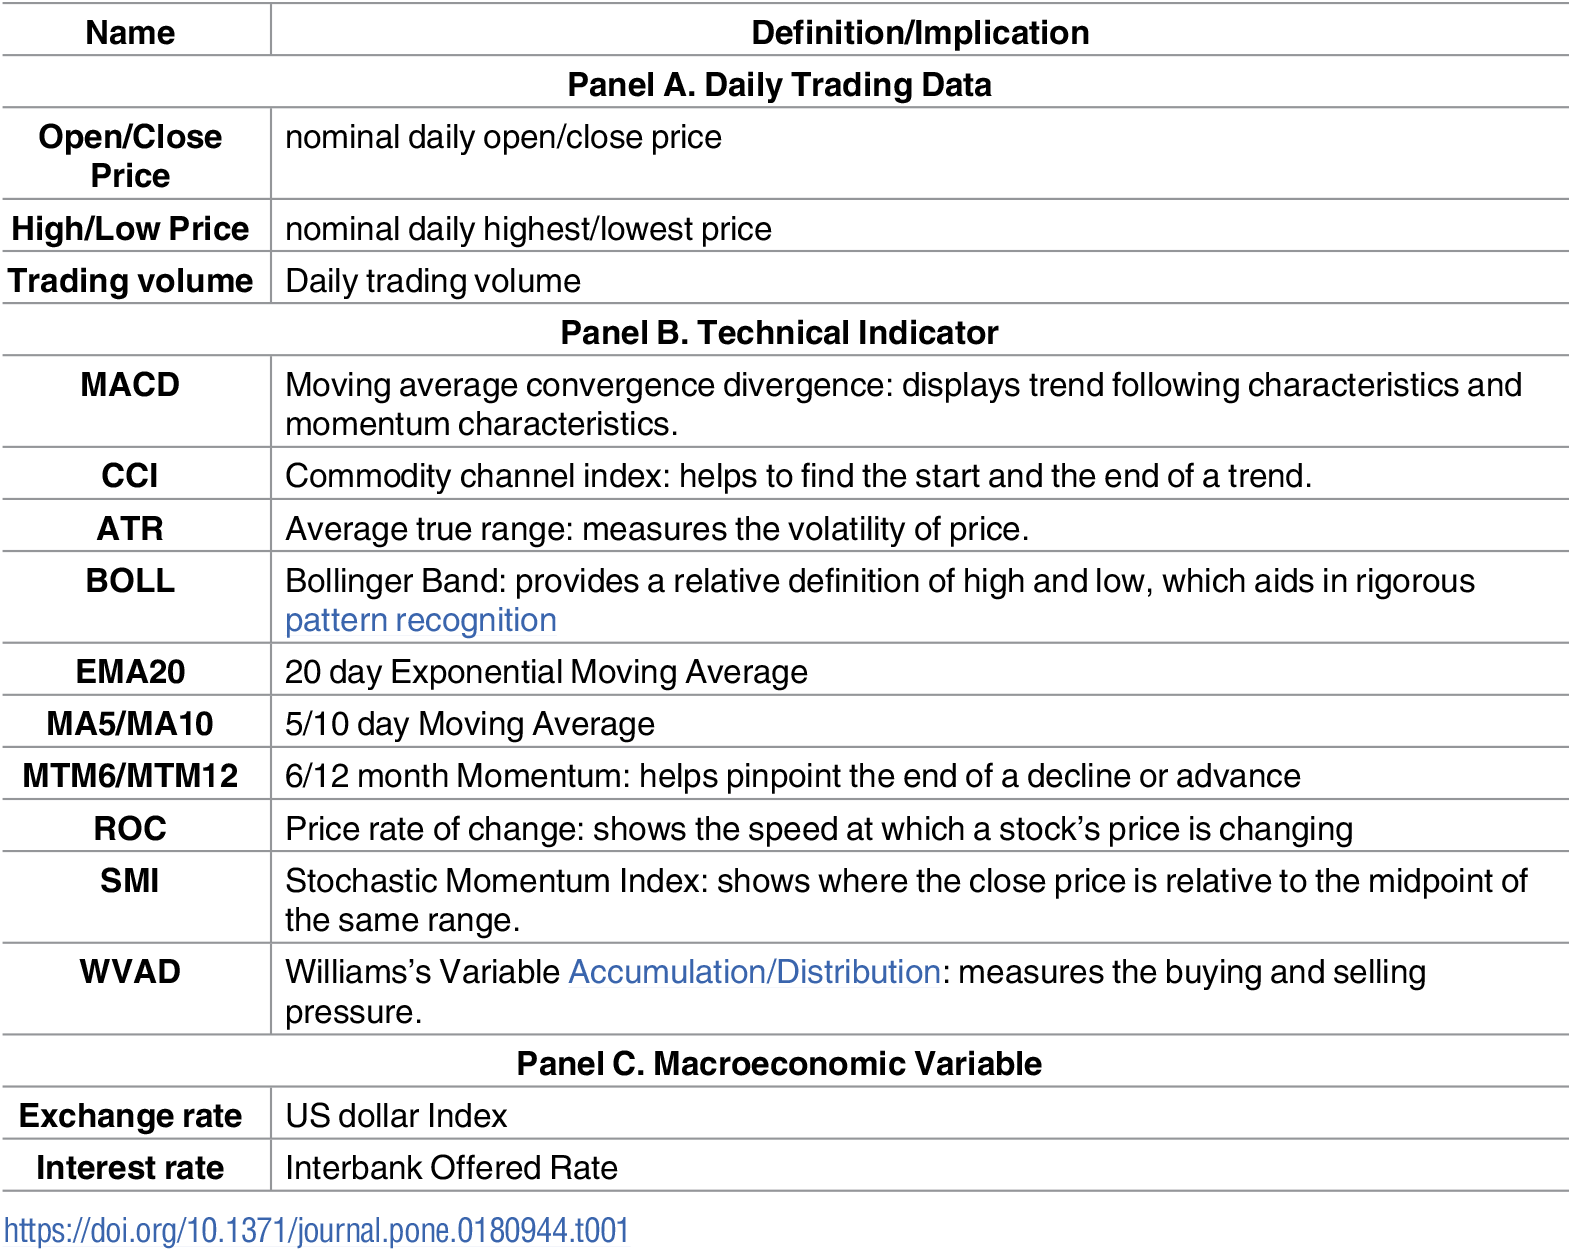

In [63]:
# Drop column 'matlab_time' from all dataframes in OrderedDict + rename OHLC columns for consistency
for item in dict_dataframes:
    for subitem in dict_dataframes[item]:
        if 'matlab_time' in subitem:
            print(subitem,"Dropped from ", item)
            dict_dataframes[item].drop(subitem,axis=1, inplace=True) 
        # Rename OHLC columns for consistency
        if 'open price' in subitem:
            print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'open price':'open'},inplace=True)
        if 'high price' in subitem:
            print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'high price':'high'},inplace=True)
        if 'low price' in subitem:
            print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'low price':'low'},inplace=True)
        if 'closing price' in subitem:
            print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'closing price':'close'},inplace=True)
        if 'close price' in subitem:
            print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'close price':'close'},inplace=True)     

open price Renamed from  csi300 index data
high price Renamed from  csi300 index data
low price Renamed from  csi300 index data
closing price Renamed from  csi300 index data
matlab_time Dropped from  csi300 index future data
open price Renamed from  nifty 50 index data
high price Renamed from  nifty 50 index data
low price Renamed from  nifty 50 index data
closing price Renamed from  nifty 50 index data
close price Renamed from  nifty 50 index future data
closing price Renamed from  hangseng index data
open price Renamed from  hangseng index data
high price Renamed from  hangseng index data
low price Renamed from  hangseng index data
matlab_time Dropped from  hangseng index future data
open price Renamed from  nikkei 225 index data
closing price Renamed from  nikkei 225 index data
high price Renamed from  nikkei 225 index data
low price Renamed from  nikkei 225 index data
close price Renamed from  nikkei 225 index future data
close price Renamed from  s&p500 index data
open price Renam

In [41]:
#print("\n".join(list(dict_dataframes.keys())))

In [64]:
# Rename date/ntime columns to date and drop mislabeled matlab_time columns
dict_dataframes['csi300 index data'].rename(columns={'time':'date'},inplace=True)
dict_dataframes['csi300 index future data'].rename(columns={'num_time':'date'},inplace=True)

dict_dataframes['nifty 50 index data'].drop(columns=['ntime'],axis=1, inplace=True)
dict_dataframes['nifty 50 index future data'].drop(columns=['ntime'],axis=1, inplace=True)

dict_dataframes['hangseng index data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['hangseng index data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['hangseng index future data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['nikkei 225 index data'].rename(columns={'ntime':'date'},inplace=True)
dict_dataframes['nikkei 225 index data'].drop(columns=['time'],axis=1, inplace=True)

dict_dataframes['nikkei 225 index future data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['nikkei 225 index future data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['s&p500 index data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['s&p500 index data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['djia index data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['djia index data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['djia index future data'].drop(columns=['time'],axis=1, inplace=True)

In [65]:
# Verify date rename + column drop/rename

for item in dict_dataframes:
    # Obtain number of rows in dataframe
    rc=dict_dataframes[item].shape[0]
    # Obtain number of columns in dataframe
    cc =  len(dict_dataframes[item].columns)
    print ("=======================================")
    print (item,"\n")
    print (dict_dataframes[item].info(verbose=False))

csi300 index data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Columns: 20 entries, date to wvad
dtypes: float64(19), int64(1)
memory usage: 314.1 KB
None
csi300 index future data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 2 entries, date to close
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
nifty 50 index data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Columns: 20 entries, date to interbank offered rate
dtypes: float64(18), int64(2)
memory usage: 319.3 KB
None
nifty 50 index future data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Columns: 2 entries, date to close
dtypes: float64(1), int64(1)
memory usage: 23.4 KB
None
hangseng index data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Columns: 20 entries, date to hibor
dtypes: float64(19), int64(1)
memory usage: 318.4 KB
None
hangseng index future data 

<class

In [66]:
# Alternate method to drop Drop column 'matlab_time' from all dataframes in OrderedDict

# a = dict_dataframes
# for i, (key, value) in enumerate(a.items()):
#     print (i, key)
#     print(value.columns)
#     if ('matlab_time' in value.columns) is True:
#         print("True")
#         print(i,key)
#         dict_dataframes[key].drop('matlab_time',axis=1, inplace=True)
#     i[item].drop('matlab_time', inplace=True)

In [68]:
# Save cleaned data to disk

def frames_to_excel(df_dict, path):
    # frames_to_excel() source: https://stackoverflow.com/q/51696940
    """Write dictionary of dataframes to separate sheets, within 
        1 file."""
    writer = pd.ExcelWriter(path, engine='xlsxwriter')
    for tab_name, dframe in df_dict.items():
        dframe.to_excel(writer, sheet_name=tab_name)
    writer.save() 
    
frames_to_excel(dict_dataframes,"data/clean_data.xlsx")

In [ ]:
#############################################################################